## Stochastic Portfolio Theory

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt 
import yfinance as yf
import math

In [2]:
initial_portfolio_value = 100000
variable_portfolio_value = 0
final_portfolio_value = 0

In [3]:
data = yf.download(['aapl','msft','googl','orcl','amzn','tsla','ko','jnj',
                    'unh','meta','nvda','xom','jpm','wmt','pg','ma','cvx','lly','hd','bac']
                    ,dt(2000,1,1),dt(2022,12,31))

[*********************100%***********************]  20 of 20 completed


In [4]:
data.head()

Adj Close                                                   \
                AAPL      AMZN        BAC        CVX GOOGL         HD   
Date                                                                    
2000-01-03  0.851942  4.468750  13.443510  18.007631   NaN  40.923843   
2000-01-04  0.780115  4.096875  12.645573  18.007631   NaN  38.765839   
2000-01-05  0.791531  3.487500  12.784341  18.330633   NaN  39.550587   
2000-01-06  0.723033  3.278125  13.877170  19.111235   NaN  37.667213   
2000-01-07  0.757282  3.478125  13.512897  19.447697   NaN  39.864471   

                                                        ... Volume       \
                  JNJ        JPM         KO        LLY  ...     MA META   
Date                                                    ...               
2000-01-03  25.641325  24.597775  15.008611  33.394157  ...    NaN  NaN   
2000-01-04  24.702585  24.058056  15.025255  32.343632  ...    NaN  NaN   
2000-01-05  24.963346  23.909557  15.158371  32.757469  ...    NaN  NaN   
2000-01-06  25.745636  24.248987  15.175015  33.712502  ...    NaN  NaN   
2000-01-07  26.840816  24.694515  16.173372  36.195568  ...    NaN  NaN   

                                                                              \
                MSFT        NVDA       ORCL       PG TSLA       UNH      WMT   
Date                                                                           
2000-01-03  53228400  30091200.0   98114800  4275000  NaN   3431200  8369900   
2000-01-04  54119000  30048000.0  116824800  4270800  NaN   5997600  6745100   
2000-01-05  64059600  18835200.0  166054000  5098400  NaN  10562400  7018700   
2000-01-06  54976600  12048000.0  109880000  6524200  NaN  15300000  6544500   
2000-01-07  62013600   7118400.0   91755600  9832000  NaN  16160800  7976900   

                      
                 XOM  
Date                  
2000-01-03  13458200  
2000-01-04  14510800  
2000-01-05  17485000  
2000-01-06  19461600  
2000-01-07  16603800  

[5 rows x 120 columns]

In [5]:
data['Adj Close'].head()

,AAPL,AMZN,BAC,CVX,GOOGL,HD,JNJ,JPM,KO,LLY,MA,META,MSFT,NVDA,ORCL,PG,TSLA,UNH,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.851942,4.468750,13.443510,18.007631,NaN,40.923843,25.641325,24.597775,15.008611,33.394157,NaN,NaN,36.452637,0.895047,24.477552,29.150455,NaN,5.503510,44.220280,19.130640
2000-01-04,0.780115,4.096875,12.645573,18.007631,NaN,38.765839,24.702585,24.058056,15.025255,32.343632,NaN,NaN,35.221264,0.871148,22.314716,28.589540,NaN,5.433116,42.565651,18.764200
2000-01-05,0.791531,3.487500,12.784341,18.330633,NaN,39.550587,24.963346,23.909557,15.158371,32.757469,NaN,NaN,35.592628,0.842468,21.136171,28.045633,NaN,5.420319,41.696953,19.787151
2000-01-06,0.723033,3.278125,13.877170,19.111235,NaN,37.667213,25.745636,24.248987,15.175015,33.712502,NaN,NaN,34.400360,0.787498,19.892857,29.337425,NaN,5.618700,42.151974,20.810101
2000-01-07,0.757282,3.478125,13.512897,19.447697,NaN,39.864471,26.840816,24.694515,16.173372,36.195568,NaN,NaN,34.849903,0.800643,21.421089,31.683065,NaN,6.277842,45.337154,20.749035


In [6]:
data['Adj Close'].tail()

,AAPL,AMZN,BAC,CVX,GOOGL,HD,JNJ,JPM,KO,LLY,MA,META,MSFT,NVDA,ORCL,PG,TSLA,UNH,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,
2022-12-23,131.860001,85.250000,32.470001,177.399994,89.230003,318.730011,177.479996,130.317398,63.820000,367.899994,343.043243,118.040001,238.729996,152.059998,80.547966,152.619995,123.150002,531.309998,143.770004,108.680000
2022-12-27,130.029999,83.040001,32.529999,179.630005,87.389999,319.549988,177.429993,130.774033,64.209999,364.880005,345.599091,116.879997,236.960007,141.210007,80.677483,153.949997,109.099998,531.989990,143.809998,110.190002
2022-12-28,126.040001,81.820000,32.770000,176.979996,86.019997,315.730011,176.660004,131.488754,63.570000,365.220001,341.395935,115.620003,234.529999,140.360001,80.029915,151.960007,112.709999,528.450012,141.289993,108.379997
2022-12-29,129.610001,84.180000,33.139999,178.320007,88.449997,320.410004,177.559998,132.243179,63.950001,367.019989,347.645782,120.260002,241.009995,146.029999,81.095917,152.589996,121.820000,529.880005,142.149994,109.199997
2022-12-30,129.929993,84.000000,33.119999,179.490005,88.230003,315.859985,176.649994,133.116730,63.610001,365.839996,347.166565,120.339996,239.820007,146.139999,81.434639,151.559998,123.180000,530.179993,141.789993,110.300003


In [7]:
close_price = data['Adj Close']

In [8]:
close_price.head()

,AAPL,AMZN,BAC,CVX,GOOGL,HD,JNJ,JPM,KO,LLY,MA,META,MSFT,NVDA,ORCL,PG,TSLA,UNH,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.851942,4.468750,13.443510,18.007631,NaN,40.923843,25.641325,24.597775,15.008611,33.394157,NaN,NaN,36.452637,0.895047,24.477552,29.150455,NaN,5.503510,44.220280,19.130640
2000-01-04,0.780115,4.096875,12.645573,18.007631,NaN,38.765839,24.702585,24.058056,15.025255,32.343632,NaN,NaN,35.221264,0.871148,22.314716,28.589540,NaN,5.433116,42.565651,18.764200
2000-01-05,0.791531,3.487500,12.784341,18.330633,NaN,39.550587,24.963346,23.909557,15.158371,32.757469,NaN,NaN,35.592628,0.842468,21.136171,28.045633,NaN,5.420319,41.696953,19.787151
2000-01-06,0.723033,3.278125,13.877170,19.111235,NaN,37.667213,25.745636,24.248987,15.175015,33.712502,NaN,NaN,34.400360,0.787498,19.892857,29.337425,NaN,5.618700,42.151974,20.810101
2000-01-07,0.757282,3.478125,13.512897,19.447697,NaN,39.864471,26.840816,24.694515,16.173372,36.195568,NaN,NaN,34.849903,0.800643,21.421089,31.683065,NaN,6.277842,45.337154,20.749035


In [9]:
close_price = close_price.fillna(0)

In [10]:
close_price.head()

,AAPL,AMZN,BAC,CVX,GOOGL,HD,JNJ,JPM,KO,LLY,MA,META,MSFT,NVDA,ORCL,PG,TSLA,UNH,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.851942,4.468750,13.443510,18.007631,0.0,40.923843,25.641325,24.597775,15.008611,33.394157,0.0,0.0,36.452637,0.895047,24.477552,29.150455,0.0,5.503510,44.220280,19.130640
2000-01-04,0.780115,4.096875,12.645573,18.007631,0.0,38.765839,24.702585,24.058056,15.025255,32.343632,0.0,0.0,35.221264,0.871148,22.314716,28.589540,0.0,5.433116,42.565651,18.764200
2000-01-05,0.791531,3.487500,12.784341,18.330633,0.0,39.550587,24.963346,23.909557,15.158371,32.757469,0.0,0.0,35.592628,0.842468,21.136171,28.045633,0.0,5.420319,41.696953,19.787151
2000-01-06,0.723033,3.278125,13.877170,19.111235,0.0,37.667213,25.745636,24.248987,15.175015,33.712502,0.0,0.0,34.400360,0.787498,19.892857,29.337425,0.0,5.618700,42.151974,20.810101
2000-01-07,0.757282,3.478125,13.512897,19.447697,0.0,39.864471,26.840816,24.694515,16.173372,36.195568,0.0,0.0,34.849903,0.800643,21.421089,31.683065,0.0,6.277842,45.337154,20.749035


In [11]:
scripts = close_price.columns
scripts = list(scripts)
print(scripts)

['AAPL', 'AMZN', 'BAC', 'CVX', 'GOOGL', 'HD', 'JNJ', 'JPM', 'KO', 'LLY', 'MA', 'META', 'MSFT', 'NVDA', 'ORCL', 'PG', 'TSLA', 'UNH', 'WMT', 'XOM']


In [12]:
close_price['total']=close_price.sum(axis = 1)

In [13]:
close_price['total']

Date
2000-01-03     336.167666
2000-01-04     324.185196
2000-01-05     324.254660
2000-01-06     326.537830
2000-01-07     342.083477
                 ...     
2022-12-23    3566.408600
2022-12-27    3539.830589
2022-12-28    3511.024624
2022-12-29    3566.564861
2022-12-30    3561.757900
Name: total, Length: 5787, dtype: float64

In [14]:
portfolios = ['Market','Diversity','Equally','Entropy','Capitalization']
portfolio_values = np.zeros([len(close_price),len(portfolios)])
portfolio_values = pd.DataFrame(portfolio_values,columns=portfolios,index=close_price.index)
portfolio_values.head()

,Market,Diversity,Equally,Entropy,Capitalization
Date,,,,,
2000-01-03,0.0,0.0,0.0,0.0,0.0
2000-01-04,0.0,0.0,0.0,0.0,0.0
2000-01-05,0.0,0.0,0.0,0.0,0.0
2000-01-06,0.0,0.0,0.0,0.0,0.0
2000-01-07,0.0,0.0,0.0,0.0,0.0


# Market Portfolio

In [15]:
#Market Weights
market_weights = np.zeros([len(close_price),len(scripts)])
market_weights = pd.DataFrame(market_weights,columns=scripts,index=close_price.index)
for i in scripts:
    for j in range(len(close_price)):
        market_weights[i][j] = close_price[i][j]/close_price['total'][j]
market_weights

,AAPL,AMZN,BAC,CVX,GOOGL,HD,JNJ,JPM,KO,LLY,MA,META,MSFT,NVDA,ORCL,PG,TSLA,UNH,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.002534,0.013293,0.039990,0.053567,0.000000,0.121736,0.076275,0.073171,0.044646,0.099338,0.000000,0.000000,0.108436,0.002663,0.072814,0.086714,0.000000,0.016371,0.131542,0.056908
2000-01-04,0.002406,0.012637,0.039007,0.055547,0.000000,0.119579,0.076199,0.074211,0.046348,0.099769,0.000000,0.000000,0.108646,0.002687,0.068833,0.088189,0.000000,0.016759,0.131300,0.057881
2000-01-05,0.002441,0.010755,0.039427,0.056532,0.000000,0.121974,0.076987,0.073737,0.046748,0.101024,0.000000,0.000000,0.109768,0.002598,0.065184,0.086493,0.000000,0.016716,0.128593,0.061023
2000-01-06,0.002214,0.010039,0.042498,0.058527,0.000000,0.115353,0.078844,0.074261,0.046472,0.103242,0.000000,0.000000,0.105349,0.002412,0.060921,0.089844,0.000000,0.017207,0.129088,0.063730
2000-01-07,0.002214,0.010167,0.039502,0.056851,0.000000,0.116534,0.078463,0.072189,0.047279,0.105809,0.000000,0.000000,0.101875,0.002340,0.062619,0.092618,0.000000,0.018352,0.132532,0.060655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.036973,0.023904,0.009104,0.049742,0.025020,0.089370,0.049764,0.036540,0.017895,0.103157,0.096187,0.033098,0.066938,0.042637,0.022585,0.042794,0.034531,0.148976,0.040312,0.030473
2022-12-27,0.036733,0.023459,0.009190,0.050745,0.024688,0.090273,0.050124,0.036944,0.018139,0.103078,0.097632,0.033019,0.066941,0.039892,0.022791,0.043491,0.030821,0.150287,0.040626,0.031129
2022-12-28,0.035898,0.023304,0.009333,0.050407,0.024500,0.089925,0.050316,0.037450,0.018106,0.104021,0.097235,0.032931,0.066798,0.039977,0.022794,0.043281,0.032102,0.150512,0.040242,0.030868


In [16]:
for i in range(len(close_price)):
    if i==0:
        portfolio_values['Market'][i]=initial_portfolio_value
    else:
        portfolio_values['Market'][i]=(close_price['total'][i]/close_price['total'][i-1])*portfolio_values['Market'][i-1]
portfolio_values

,Market,Diversity,Equally,Entropy,Capitalization
Date,,,,,
2000-01-03,1.000000e+05,0.0,0.0,0.0,0.0
2000-01-04,9.643557e+04,0.0,0.0,0.0,0.0
2000-01-05,9.645623e+04,0.0,0.0,0.0,0.0
2000-01-06,9.713541e+04,0.0,0.0,0.0,0.0
2000-01-07,1.017598e+05,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2022-12-23,1.060902e+06,0.0,0.0,0.0,0.0
2022-12-27,1.052996e+06,0.0,0.0,0.0,0.0
2022-12-28,1.044427e+06,0.0,0.0,0.0,0.0


# Diversity Weighted Portfolio

In [17]:
def MarketWeightsP(p):
    market_weights_p = market_weights
    for i in market_weights.columns:
        for j in range(len(market_weights)):
            market_weights_p[i][j] = market_weights[i][j]**p
    market_weights_p['total'] = market_weights.sum(axis = 1)
    return market_weights_p

In [18]:
#Diversity Weights
diversity_weights = np.zeros([len(close_price),len(scripts)])
diversity_weights = pd.DataFrame(diversity_weights,columns=scripts,index=close_price.index)
market_weights_p = MarketWeightsP(0.5)

for i in scripts:
    for j in range(len(close_price)):
        diversity_weights[i][j] = market_weights_p[i][j]/market_weights_p['total'][j]


In [19]:
market_weights_p

,AAPL,AMZN,BAC,CVX,GOOGL,HD,JNJ,JPM,KO,LLY,...,META,MSFT,NVDA,ORCL,PG,TSLA,UNH,WMT,XOM,total
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.050342,0.115296,0.199976,0.231446,0.000000,0.348907,0.276180,0.270502,0.211296,0.315179,...,0.000000,0.329296,0.051599,0.269840,0.294472,0.000000,0.127950,0.362688,0.238554,3.693525
2000-01-04,0.049055,0.112416,0.197503,0.235685,0.000000,0.345802,0.276042,0.272417,0.215285,0.315862,...,0.000000,0.329614,0.051838,0.262361,0.296966,0.000000,0.129458,0.362354,0.240585,3.693243
2000-01-05,0.049407,0.103708,0.198562,0.237764,0.000000,0.349248,0.277465,0.271546,0.216214,0.317843,...,0.000000,0.331312,0.050972,0.255311,0.294096,0.000000,0.129291,0.358599,0.247029,3.688367
2000-01-06,0.047056,0.100195,0.206150,0.241923,0.000000,0.339637,0.280792,0.272508,0.215575,0.321313,...,0.000000,0.324575,0.049109,0.246821,0.299740,0.000000,0.131175,0.359288,0.252447,3.688303
2000-01-07,0.047050,0.100834,0.198750,0.238434,0.000000,0.341371,0.280112,0.268679,0.217437,0.325283,...,0.000000,0.319179,0.048379,0.250239,0.304332,0.000000,0.135469,0.364050,0.246282,3.685882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.192283,0.154608,0.095417,0.223029,0.158176,0.298948,0.223079,0.191155,0.133771,0.321181,...,0.181928,0.258725,0.206487,0.150284,0.206867,0.185824,0.385974,0.200779,0.174566,4.253220
2022-12-27,0.191660,0.153162,0.095863,0.225267,0.157123,0.300454,0.223884,0.192207,0.134682,0.321058,...,0.181710,0.258730,0.199729,0.150968,0.208544,0.175558,0.387668,0.201560,0.176433,4.248722
2022-12-28,0.189469,0.152656,0.096610,0.224515,0.156525,0.299876,0.224312,0.193521,0.134558,0.322523,...,0.181468,0.258453,0.199942,0.150976,0.208040,0.179170,0.387958,0.200604,0.175694,4.248694


In [20]:
diversity_weights

,AAPL,AMZN,BAC,CVX,GOOGL,HD,JNJ,JPM,KO,LLY,MA,META,MSFT,NVDA,ORCL,PG,TSLA,UNH,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.013630,0.031216,0.054142,0.062663,0.000000,0.094465,0.074774,0.073237,0.057207,0.085333,0.000000,0.000000,0.089155,0.013970,0.073058,0.079727,0.000000,0.034642,0.098196,0.064587
2000-01-04,0.013282,0.030438,0.053477,0.063815,0.000000,0.093631,0.074742,0.073761,0.058292,0.085524,0.000000,0.000000,0.089248,0.014036,0.071038,0.080408,0.000000,0.035053,0.098113,0.065142
2000-01-05,0.013395,0.028118,0.053835,0.064463,0.000000,0.094689,0.075227,0.073622,0.058620,0.086174,0.000000,0.000000,0.089826,0.013820,0.069221,0.079736,0.000000,0.035054,0.097224,0.066975
2000-01-06,0.012758,0.027166,0.055893,0.065592,0.000000,0.092085,0.076130,0.073885,0.058448,0.087117,0.000000,0.000000,0.088001,0.013315,0.066920,0.081268,0.000000,0.035565,0.097413,0.068445
2000-01-07,0.012765,0.027357,0.053922,0.064688,0.000000,0.092616,0.075996,0.072894,0.058992,0.088251,0.000000,0.000000,0.086595,0.013125,0.067891,0.082567,0.000000,0.036753,0.098769,0.066818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.045209,0.036351,0.022434,0.052438,0.037190,0.070287,0.052449,0.044944,0.031452,0.075515,0.072919,0.042774,0.060830,0.048548,0.035334,0.048638,0.043690,0.090749,0.047206,0.041043
2022-12-27,0.045110,0.036049,0.022563,0.053020,0.036981,0.070716,0.052694,0.045239,0.031699,0.075566,0.073542,0.042768,0.060896,0.047009,0.035533,0.049084,0.041320,0.091244,0.047440,0.041526
2022-12-28,0.044595,0.035930,0.022739,0.052843,0.036841,0.070581,0.052795,0.045548,0.031670,0.075911,0.073393,0.042711,0.060831,0.047060,0.035535,0.048966,0.042171,0.091312,0.047215,0.041353


In [21]:
for j in range(len(diversity_weights)):
    for i in scripts:
        if j==0:
            portfolio_values['Diversity'][j]+=initial_portfolio_value*diversity_weights[i][j]
        else:
            if close_price[i][j-1] != 0:
                portfolio_values['Diversity'][j]+=(portfolio_values['Diversity'][j-1]*diversity_weights[i][j-1]*(close_price[i][j]/close_price[i][j-1]))
portfolio_values

,Market,Diversity,Equally,Entropy,Capitalization
Date,,,,,
2000-01-03,1.000000e+05,1.000000e+05,0.0,0.0,0.0
2000-01-04,9.643557e+04,9.643642e+04,0.0,0.0,0.0
2000-01-05,9.645623e+04,9.623409e+04,0.0,0.0,0.0
2000-01-06,9.713541e+04,9.695263e+04,0.0,0.0,0.0
2000-01-07,1.017598e+05,1.014630e+05,0.0,0.0,0.0
...,...,...,...,...,...
2022-12-23,1.060902e+06,1.611765e+06,0.0,0.0,0.0
2022-12-27,1.052996e+06,1.596717e+06,0.0,0.0,0.0
2022-12-28,1.044427e+06,1.583755e+06,0.0,0.0,0.0


# Equally Weighted Portfolio

In [22]:
equal_weights = 1/len(scripts)
equal_weights

0.05

In [23]:
value = 100000
for j in range(len(close_price)):
    x=0
    for i in scripts:
        if close_price[i][j]!=0:
            x+=1
    for i in scripts:
        if j==0 and close_price[i][j]!=0:
            portfolio_values['Equally'][j]+=initial_portfolio_value/x
        else:
            if close_price[i][j]!=0 and close_price[i][j-1]!=0:
                portfolio_values['Equally'][j]+=portfolio_values['Equally'][j-1]*(close_price[i][j]/close_price[i][j-1])/x
portfolio_values

,Market,Diversity,Equally,Entropy,Capitalization
Date,,,,,
2000-01-03,1.000000e+05,1.000000e+05,1.000000e+05,0.0,0.0
2000-01-04,9.643557e+04,9.643642e+04,9.621273e+04,0.0,0.0
2000-01-05,9.645623e+04,9.623409e+04,9.548283e+04,0.0,0.0
2000-01-06,9.713541e+04,9.695263e+04,9.546707e+04,0.0,0.0
2000-01-07,1.017598e+05,1.014630e+05,9.985201e+04,0.0,0.0
...,...,...,...,...,...
2022-12-23,1.060902e+06,1.611765e+06,3.106767e+06,0.0,0.0
2022-12-27,1.052996e+06,1.596717e+06,3.073871e+06,0.0,0.0
2022-12-28,1.044427e+06,1.583755e+06,3.049899e+06,0.0,0.0


# Entropy Weighted Portfolio

In [24]:
entropy_weights = -1*market_weights*np.log(market_weights)
entropy_weights = entropy_weights.fillna(0)
entropy_weights['total'] = portfolio_values['Capitalization'] #all total values to zero
entropy_weights['total'] = entropy_weights.sum(axis=1)
for i in scripts:
    for j in range(len(entropy_weights)):
        entropy_weights[i][j]=entropy_weights[i][j]/entropy_weights['total'][j]
entropy_weights

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,AAPL,AMZN,BAC,CVX,GOOGL,HD,JNJ,JPM,KO,LLY,...,META,MSFT,NVDA,ORCL,PG,TSLA,UNH,WMT,XOM,total
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.029891,0.049478,0.063941,0.067284,0.000000,0.072981,0.070593,0.070258,0.065249,0.072292,...,0.000000,0.072663,0.030385,0.070218,0.071517,0.000000,0.052262,0.073073,0.067916,5.033924
2000-01-04,0.029390,0.048825,0.063661,0.067691,0.000000,0.072972,0.070611,0.070400,0.065705,0.072339,...,0.000000,0.072697,0.030489,0.069762,0.071652,0.000000,0.052595,0.073098,0.068114,5.032091
2000-01-05,0.029586,0.046793,0.063912,0.068001,0.000000,0.073149,0.070825,0.070480,0.065928,0.072534,...,0.000000,0.072870,0.030207,0.069400,0.071662,0.000000,0.052660,0.073221,0.068771,5.022603
2000-01-06,0.028662,0.045938,0.064876,0.068419,0.000000,0.073092,0.071075,0.070604,0.065922,0.072700,...,0.000000,0.072784,0.029494,0.068819,0.071970,0.000000,0.053099,0.073293,0.069253,5.017901
2000-01-07,0.028675,0.046128,0.064030,0.068160,0.000000,0.073158,0.071076,0.070408,0.066154,0.072841,...,0.000000,0.072680,0.029216,0.069123,0.072190,0.000000,0.053997,0.073349,0.068813,5.015177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.049780,0.045321,0.035201,0.052546,0.045800,0.056680,0.052549,0.049665,0.042253,0.057278,...,0.048681,0.054924,0.051147,0.044722,0.051181,0.049105,0.057695,0.050617,0.047843,6.368661
2022-12-27,0.049766,0.045167,0.035330,0.052772,0.045705,0.056785,0.052664,0.049822,0.042440,0.057332,...,0.048705,0.054979,0.050566,0.044863,0.051383,0.048006,0.057739,0.050741,0.048108,6.362371
2022-12-28,0.049538,0.045096,0.035486,0.052712,0.045623,0.056764,0.052696,0.049953,0.042418,0.057360,...,0.048676,0.054961,0.050585,0.044862,0.051336,0.048419,0.057734,0.050648,0.048020,6.362595


In [25]:
for j in range(len(entropy_weights)):
    for i in scripts:
        if j==0:
            portfolio_values['Entropy'][j]+=initial_portfolio_value*entropy_weights[i][j]
        else:
            if close_price[i][j-1] != 0:
                portfolio_values['Entropy'][j]+=(portfolio_values['Entropy'][j-1]*entropy_weights[i][j-1]*(close_price[i][j]/close_price[i][j-1]))
portfolio_values

,Market,Diversity,Equally,Entropy,Capitalization
Date,,,,,
2000-01-03,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,0.0
2000-01-04,9.643557e+04,9.643642e+04,9.621273e+04,9.638409e+04,0.0
2000-01-05,9.645623e+04,9.623409e+04,9.548283e+04,9.592039e+04,0.0
2000-01-06,9.713541e+04,9.695263e+04,9.546707e+04,9.649606e+04,0.0
2000-01-07,1.017598e+05,1.014630e+05,9.985201e+04,1.009336e+05,0.0
...,...,...,...,...,...
2022-12-23,1.060902e+06,1.611765e+06,3.106767e+06,2.523629e+06,0.0
2022-12-27,1.052996e+06,1.596717e+06,3.073871e+06,2.497299e+06,0.0
2022-12-28,1.044427e+06,1.583755e+06,3.049899e+06,2.477278e+06,0.0


# Capitalization Weighted Portfolio

In [26]:
capitalization_constants = market_weights*0
capitalization_constants=capitalization_constants.drop(labels='total',axis=1)
capitalization_constants

,AAPL,AMZN,BAC,CVX,GOOGL,HD,JNJ,JPM,KO,LLY,MA,META,MSFT,NVDA,ORCL,PG,TSLA,UNH,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#capitalization weights
for j in range(len(market_weights)):
    for i in scripts:
        if close_price[i][j]>=close_price['total'][j]/len(scripts):
            capitalization_constants[i][j]=1
            
capitalization_weights = capitalization_constants*market_weights
capitalization_weights = capitalization_weights.drop(labels='total',axis=1)
capitalization_weights['total']=capitalization_weights.sum(axis=1)

for j in range(len(capitalization_weights)):
    for i in scripts:
        capitalization_weights[i][j]=capitalization_weights[i][j]/capitalization_weights['total'][j]
capitalization_weights

,AAPL,AMZN,BAC,CVX,GOOGL,HD,JNJ,JPM,KO,LLY,...,META,MSFT,NVDA,ORCL,PG,TSLA,UNH,WMT,XOM,total
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.0,0.0,0.0,0.078802,0.0,0.118795,0.094033,0.092099,0.0,0.107311,...,0.0,0.112117,0.0,0.091874,0.100261,0.0,0.000000,0.123486,0.081222,2.937064
2000-01-04,0.0,0.0,0.0,0.080228,0.0,0.117712,0.093966,0.092732,0.0,0.107521,...,0.0,0.112202,0.0,0.089309,0.101088,0.0,0.000000,0.123347,0.081896,2.937688
2000-01-05,0.0,0.0,0.0,0.080866,0.0,0.118783,0.094369,0.092356,0.0,0.108102,...,0.0,0.112683,0.0,0.086834,0.100026,0.0,0.000000,0.121964,0.084018,2.940212
2000-01-06,0.0,0.0,0.0,0.082314,0.0,0.115560,0.095539,0.092720,0.0,0.109326,...,0.0,0.110435,0.0,0.083980,0.101985,0.0,0.000000,0.122246,0.085894,2.939044
2000-01-07,0.0,0.0,0.0,0.081156,0.0,0.116193,0.095342,0.091451,0.0,0.110717,...,0.0,0.108640,0.0,0.085174,0.103586,0.0,0.000000,0.123912,0.083828,2.937962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.0,0.0,0.0,0.000000,0.0,0.189812,0.000000,0.000000,0.0,0.203928,...,0.0,0.164273,0.0,0.000000,0.000000,0.0,0.245068,0.000000,0.000000,1.574969
2022-12-27,0.0,0.0,0.0,0.110995,0.0,0.148042,0.110313,0.000000,0.0,0.158194,...,0.0,0.127483,0.0,0.000000,0.000000,0.0,0.191015,0.000000,0.000000,2.029522
2022-12-28,0.0,0.0,0.0,0.110628,0.0,0.147761,0.110528,0.000000,0.0,0.158920,...,0.0,0.127351,0.0,0.000000,0.000000,0.0,0.191163,0.000000,0.000000,2.029463


In [28]:
for j in range(len(capitalization_weights)):
    for i in scripts:
        if j==0:
            portfolio_values['Capitalization'][j]+=initial_portfolio_value*capitalization_weights[i][j]
        else:
            if close_price[i][j-1] != 0:
                portfolio_values['Capitalization'][j]+=(portfolio_values['Capitalization'][j-1]*capitalization_weights[i][j-1]*(close_price[i][j]/close_price[i][j-1]))
portfolio_values

,Market,Diversity,Equally,Entropy,Capitalization
Date,,,,,
2000-01-03,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000
2000-01-04,9.643557e+04,9.643642e+04,9.621273e+04,9.638409e+04,96488.555734
2000-01-05,9.645623e+04,9.623409e+04,9.548283e+04,9.592039e+04,96691.911659
2000-01-06,9.713541e+04,9.695263e+04,9.546707e+04,9.649606e+04,97330.703062
2000-01-07,1.017598e+05,1.014630e+05,9.985201e+04,1.009336e+05,101909.570436
...,...,...,...,...,...
2022-12-23,1.060902e+06,1.611765e+06,3.106767e+06,2.523629e+06,589987.636302
2022-12-27,1.052996e+06,1.596717e+06,3.073871e+06,2.497299e+06,589620.174234
2022-12-28,1.044427e+06,1.583755e+06,3.049899e+06,2.477278e+06,584791.584548


# Comparing FGPs

In [29]:
results = np.zeros([2,len(portfolio_values.columns)])
results = pd.DataFrame(results,index=['Final_Portfolio_Value','%_Returns'],columns=portfolio_values.columns)
results.iloc[0] = portfolio_values.iloc[-1]
results.iloc[-1] = ((portfolio_values.iloc[-1]-portfolio_values.iloc[0])/portfolio_values.iloc[0])*100
results

,Market,Diversity,Equally,Entropy,Capitalization
Final_Portfolio_Value,1.059518e+06,1.610521e+06,3.107267e+06,2.522879e+06,588812.811584
%_Returns,9.595183e+02,1.510521e+03,3.007267e+03,2.422879e+03,488.812812


In [30]:
%matplotlib inline

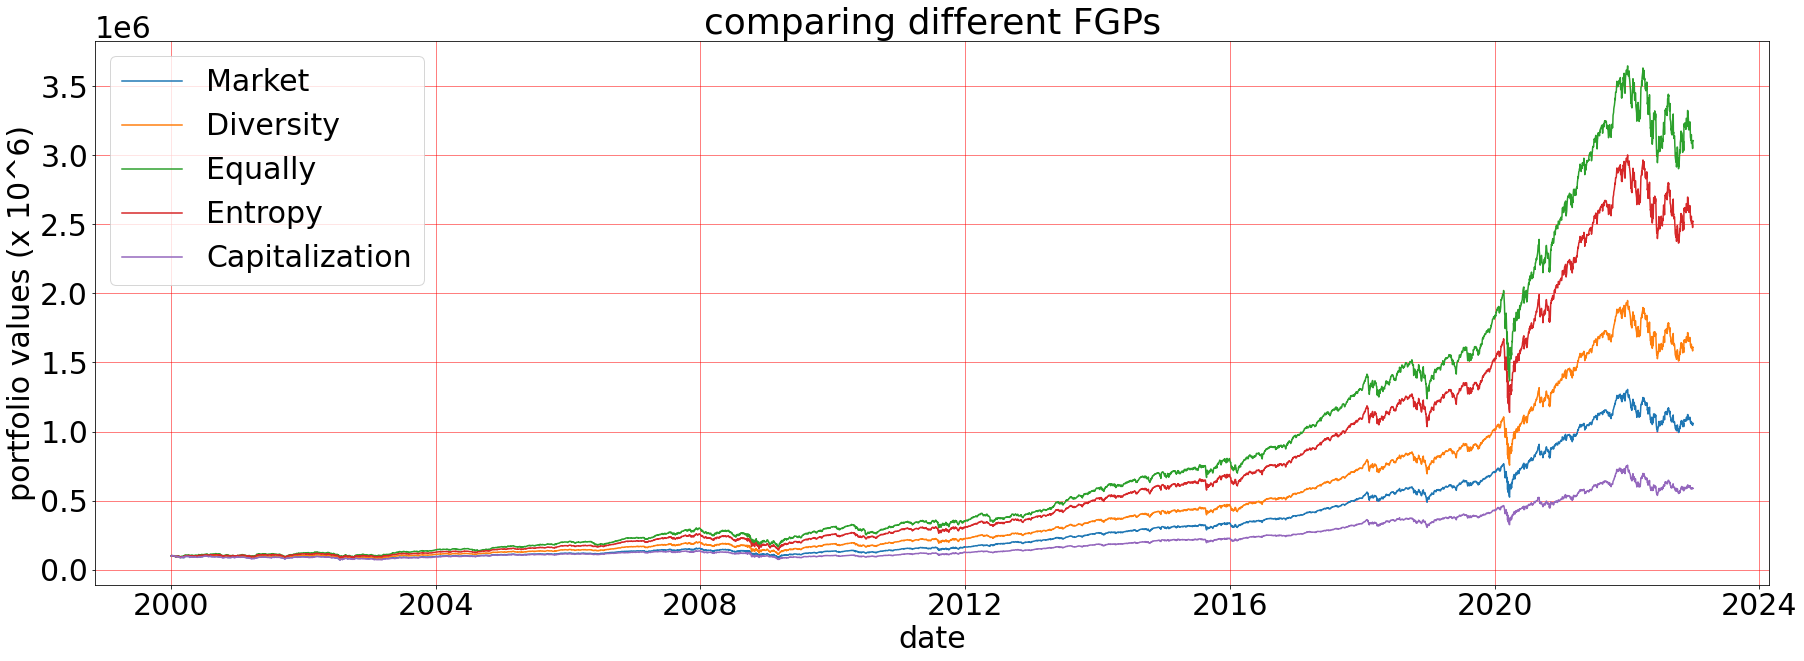

In [31]:
portfolio_type = portfolio_values.columns
x = portfolio_values.index
y = portfolio_values[portfolio_type]
plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 30})
plt.xlabel('date')
plt.ylabel('portfolio values (x 10^6)')
plt.title('comparing different FGPs')
plt.plot(x,y)
plt.legend(portfolio_type)
plt.grid(True, linewidth=0.5, color='#ff0000', linestyle='-')